## Assignment 1 (Part 2)

**Context**

The dataset provided is from an Insurance company that provides Health Insurance to its customers and is now interested in providing Vehicle Insurance as well.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

To make a data-driven decision about their new Vehicle Insurance, the Insurance company is interested in analyzing the dataset thoroughly. Your job in this scenario is to help the company by finding the answers to their questions.

**Important Points:**       
  1) Do not change the provided variable names in any cell!  
2) ... are places where you need to enter your code- your code may exceed a line and that is okay. Make sure the final variable assignment is done properly though.  
3) Be extra careful about what your final answer should contain. Read the question guidelines extra carefully.  
4) Some useful functions that you might need for this assignment are groupby(), unique(), copy(), count(), sum(), zip(), list()  
5) Variables named like df_q* always store a dataframe.

In [52]:
# Initialize Otter
import otter
grader = otter.Notebook()

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', -1)

df_main = pd.read_csv("insurance_data.csv")

**Question 1:** Set the index of df_main to id.  
**Answering Guidelines: ** Your answer is the updated df_main. You do not need to explicitly assign this to any answer variable.
<!--
BEGIN QUESTION
name: q1
points: 2
-->

In [54]:
df_main.set_index("id", inplace = True)
df_main.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
id,,,,,,,,,,
381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [55]:
grader.check("q1")

All tests passed!

**Question 2:** Use the describe() function to calculate the standard deviation of Annual_Premium.  
**Answering Guidelines: ** Your answer is a float variable that needs to be assigned to answer2. The answer has 6 dp (simply copy the answer from describe()'s output as it is).
<!--
BEGIN QUESTION
name: q2
points: 2
-->

In [56]:
df_q2 = df_main.describe()

print(df_q2)

answer2 = df_q2['Annual_Premium']['std'].round(6)
answer2

                 Age  Driving_License    Region_Code  Previously_Insured  \
count  127037.000000  127037.000000    127037.000000  127037.000000        
mean   38.765903      0.998134         26.459866      0.460039             
std    15.465814      0.043152         13.209916      0.498403             
min    20.000000      0.000000         0.000000       0.000000             
25%    25.000000      1.000000         15.000000      0.000000             
50%    36.000000      1.000000         28.000000      0.000000             
75%    49.000000      1.000000         35.000000      1.000000             
max    85.000000      1.000000         52.000000      1.000000             

       Annual_Premium  Policy_Sales_Channel        Vintage  
count  127037.000000   127037.000000         127037.000000  
mean   30524.643576    111.800468            154.318301     
std    16945.297103    54.371765             83.661588      
min    2630.000000     1.000000              10.000000      
25%    243

16945.297103

In [57]:
grader.check("q2")

All tests passed!

**Question 3:** What does each the Vintage column in the dataset mean?
Hint: build a dataframe using the 2 series in the cell below to answer the question.   
**Answering Guidelines: ** Your answer must be in a string format and should be assigned to answer3.
<!--
BEGIN QUESTION
name: q3
points: 6
-->

In [58]:
variables = pd.Series(["id"] + df_main.columns.tolist())
definition = pd.Series(["Unique ID for the customer", "Gender of the customer", "Age of the customer", "0 : Customer does not have DL, 1 : Customer already has DL", "Unique code for the region of the customer", "1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance", "Age of the Vehicle", "1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.", "The amount customer needs to pay as premium in the year", "Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.", "Number of Days, Customer has been associated with the company"])

df_q3 = pd.DataFrame({"Variables":variables, "Definition":definition})

df_q3.set_index("Variables", inplace = True)

myrow = df_q3.loc["Vintage"].values[0]
answer3 = str(myrow)

answer3

'Number of Days, Customer has been associated with the company'

In [59]:
grader.check("q3")

All tests passed!

**Question 4:** Do males pay more annual premium than females? Create a new dataframe using the original dataframe df_main to answer the question.   
**Answering Guidelines: ** The answer4 variable needs to be 'Yes' if Males pay more and 'No' if they do not.
<!--
BEGIN QUESTION
name: q4
points: 7
-->

In [60]:
answer4 = '' 

male_sum = df_main[(df_main['Gender'] == "Male")].Annual_Premium.sum()
male_sum
female_sum = df_main[df_main['Gender'] == "Female"].Annual_Premium.sum()
female_sum
df_q4 = df_main[df_main['Gender'] == "Female"]
if female_sum < male_sum:
    var = 'Yes'
else:
    var = 'No'

    
answer4 = var

print(df_q4)
answer4

        Gender  Age  Driving_License  Region_Code  Previously_Insured  \
id                                                                      
381116  Female  51   1                37.0         1                    
381119  Female  37   1                12.0         1                    
381122  Female  23   1                46.0         1                    
381124  Female  55   1                48.0         0                    
381129  Female  28   1                37.0         1                    
...        ...  ..  ..                 ...        ..                    
508135  Female  54   1                26.0         0                    
508136  Female  28   1                8.0          1                    
508140  Female  71   1                3.0          1                    
508142  Female  26   1                37.0         1                    
508143  Female  38   1                28.0         0                    

       Vehicle_Age Vehicle_Damage  Annual_Premium 

'Yes'

In [61]:
grader.check("q4")

All tests passed!

**Question 5:** Does the damage of the vehicle change your previous answer? Create a new dataframe using the original dataframe df_main to answer the question. The answer of this question must answer if males pay more premium than females given that vehicle damage is taken into consideration.   
**Answering Guidelines: ** The answer5 variable needs to be 'Yes' if Males strictly pay more (in all scenarios) and 'No' if they do not.
<!--
BEGIN QUESTION
name: q5
points: 7
-->

In [62]:
answer5 = ''

male_withcar_sum = df_main[(df_main['Gender'] == "Male") & (df_main['Vehicle_Damage'] == "Yes")].Annual_Premium.sum()
male_withcar_sum
male_withoutcar_sum = df_main[(df_main['Gender'] == "Male") & (df_main['Vehicle_Damage'] == "No")].Annual_Premium.sum()
male_withoutcar_sum
female_withcar_sum = df_main[(df_main['Gender'] == "Female") & (df_main['Vehicle_Damage'] == "Yes")].Annual_Premium.sum()
female_withcar_sum
female_withoutcar_sum = df_main[(df_main['Gender'] == "Female") & (df_main['Vehicle_Damage'] == "No")].Annual_Premium.sum()
female_withoutcar_sum


df_q5 = df_main[(df_main['Gender'] == "Male") & (df_main['Vehicle_Damage'] == "Yes")]

if (female_withcar_sum < male_withcar_sum) and (female_withoutcar_sum < male_withoutcar_sum):
    var = 'Yes'
else:
    var = 'No'

answer5 = var

print(df_q5)
answer5

       Gender  Age  Driving_License  Region_Code  Previously_Insured  \
id                                                                     
381111  Male   40   1                28.0         0                    
381112  Male   47   1                28.0         0                    
381113  Male   24   1                27.0         1                    
381118  Male   42   1                41.0         0                    
381121  Male   64   1                28.0         0                    
...      ...   ..  ..                 ...        ..                    
508125  Male   23   1                28.0         0                    
508126  Male   55   1                28.0         0                    
508128  Male   52   1                28.0         0                    
508129  Male   60   1                28.0         0                    
508132  Male   48   1                14.0         0                    

       Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales

'No'

In [63]:
grader.check("q5")

All tests passed!

**Question 6:** What is the most popular vehicle age? Create a new dataframe using the original dataframe df_main to answer the question.  
**Answering Guidelines: ** Your answer is a string stored in answer6.
<!--
BEGIN QUESTION
name: q6
points: 7
-->

In [64]:
df_q6 = df_main['Vehicle_Age'].value_counts()


print(df_q6)

answer6 = '1-2 Year'

answer6

1-2 Year     66699
< 1 Year     55019
> 2 Years    5319 
Name: Vehicle_Age, dtype: int64


'1-2 Year'

In [65]:
grader.check("q6")

All tests passed!

**Question 7:** A Checkpoint to let you know that you are doing great and are almost done!

**Question 8:** Show the trends (using a vertical bar chart) of the number of customers with no driving license as age increases. Which age has the most customers with no driving license?  
**Answering Guidelines: ** Answer8 is an int.
<!--
BEGIN QUESTION
name: q8
points: 5
-->

     counts
Age        
65   14    
73   13    
70   12    
64   12    
69   12    
77   11    
71   11    
78   11    
66   11    
76   10    
75   10    
72   9     
68   9     
74   7     
67   6     
59   6     
79   5     
80   5     
49   5     
62   5     
56   4     
54   4     
57   4     
63   4     
82   4     
53   4     
45   3     
58   3     
81   3     
44   2     
48   2     
26   2     
52   2     
55   2     
60   2     
51   1     
50   1     
47   1     
83   1     
42   1     
41   1     
36   1     
84   1     


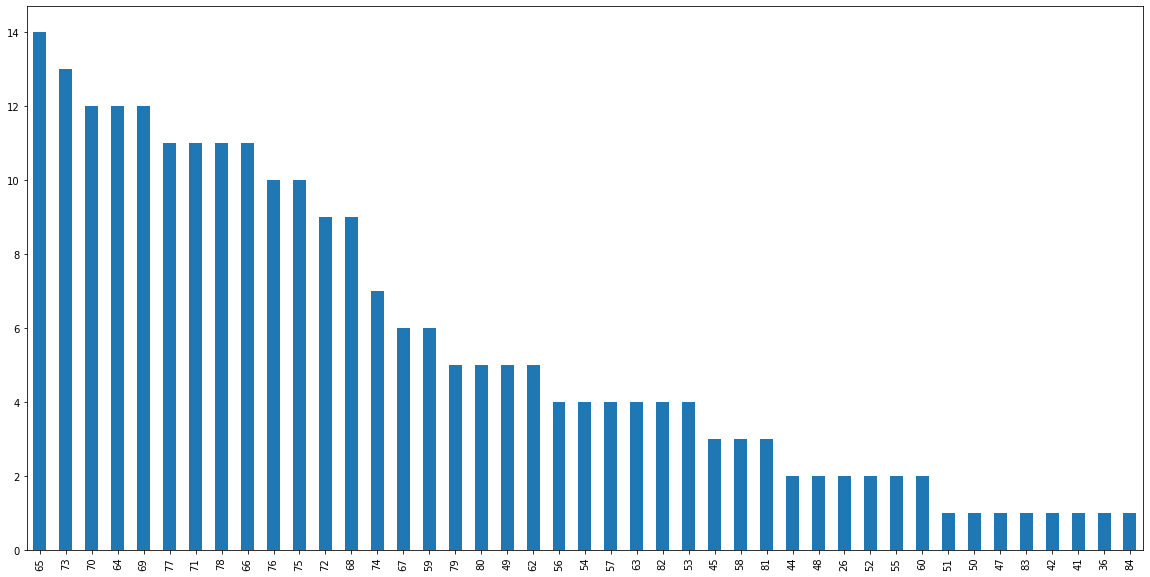

In [66]:
df1 = df_main[df_main['Driving_License'] == 0]
df_q8_nolicense = df1[["Age", "Driving_License"]]
df_q8_nolicense
unique_age = df1['Age'].unique()
unique_age
# df_q8_nolicense.plot.bar(y='count')
bargraph = df_q8_nolicense['Age'].value_counts().plot(kind='bar', figsize = (20,10))

df_q8 = df_q8_nolicense['Age'].value_counts().rename_axis('Age').reset_index(name='counts')
df_q8.set_index('Age', inplace=True)
print(df_q8)

answer8 = 65

In [67]:
grader.check("q8")

All tests passed!

**Question 9:** Which region has the lowest ratio of vintage to age?   
**Answering Guidelines: ** Your answer must be a string like '0.0' stored in answer9.
<!--
BEGIN QUESTION
name: q9
points: 8
-->

In [68]:
answer9 = ''
df_q9 = df_main
df_q9['ratio'] = df_q9['Vintage'] / df_q9['Age']
df_q9_extracted = df_q9[["Region_Code", "ratio"]]
# df_q9_grouped = df_q9_extracted.groupby('Region_Code').sum()

min_index = df_q9_extracted["ratio"].idxmin()
min_val = df_q9_extracted.loc[min_index, 'Region_Code']
min_val
answer9 = str(min_val)

print(df_q9)
answer9

        Gender  Age  Driving_License  Region_Code  Previously_Insured  \
id                                                                      
381110  Male    25   1                11.0         1                    
381111  Male    40   1                28.0         0                    
381112  Male    47   1                28.0         0                    
381113  Male    24   1                27.0         1                    
381114  Male    27   1                28.0         1                    
...      ...    ..  ..                 ...        ..                    
508142  Female  26   1                37.0         1                    
508143  Female  38   1                28.0         0                    
508144  Male    21   1                46.0         1                    
508145  Male    71   1                28.0         1                    
508146  Male    41   1                29.0         1                    

       Vehicle_Age Vehicle_Damage  Annual_Premium 

'28.0'

In [69]:
grader.check("q9")

All tests passed!

**Question 10:** Replace the values in 'Vehicle_Age' column (in df_main) with integers that denote the existing groups for example: 0 denotes '< 1 Year', 1 denotes '1-2 Year' and so on. Hint: use a function to find the distinct values in the column.  
**Answering Guidelines: ** Your answer needs to update df_main directly. Hint: Perhaps using an intermediary data structure will be useful.
<!--
BEGIN QUESTION
name: q10
points: 10
-->

In [70]:
df_10 = df_main['Vehicle_Age'].unique()
df_10

df_main['Vehicle_Age'] = df_main['Vehicle_Age'].replace({"< 1 Year" : 0, "1-2 Year" : 1, "> 2 Years": 2 })
df_main.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,ratio
id,,,,,,,,,,,
381110,Male,25,1,11.0,1,0,No,35786.0,152.0,53,2.120000
381111,Male,40,1,28.0,0,1,Yes,33762.0,7.0,111,2.775000
381112,Male,47,1,28.0,0,1,Yes,40050.0,124.0,199,4.234043
381113,Male,24,1,27.0,1,0,Yes,37356.0,152.0,187,7.791667
381114,Male,27,1,28.0,1,0,No,59097.0,152.0,297,11.000000


In [78]:
grader.check("q10")

All tests passed!

**Question 11:** What is the most popular customer gender in each region for vehicles that were not insured but had suffered damage?    
**Answering Guidelines: ** Your answer is a dataframe stored in df_q11.

<!--
BEGIN QUESTION
name: q11a
points: 10
-->

In [72]:
df_11 = df_main[(df_main['Previously_Insured'] == 0) &  (df_main['Vehicle_Damage'] == 'Yes')]
# df_11_ext = df_11[['Region_Code', 'Gender', 'Previously_Insured', 'Vehicle_Damage']] 
# df_11_ext
df_11_grouped = pd.DataFrame(df_11[['Region_Code', 'Gender', 'Vehicle_Damage']].groupby(['Region_Code', 'Gender'])) 
df_11_grouped

df_q11_group = pd.DataFrame(df_11.groupby(['Region_Code', 'Gender']).count()) 
df_q11 = df_q11_group[['Vehicle_Damage']]

df_q11

Vehicle_Damage
Region_Code Gender                
0.0         Female  126           
            Male    264           
1.0         Female  68            
            Male    156           
2.0         Female  271           
...                 ...           
50.0        Male    779           
51.0        Female  12            
            Male    36            
52.0        Female  12            
            Male    28            

[106 rows x 1 columns]

In [73]:
grader.check("q11a")

All tests passed!

**Question 12:** Make a pivot table showing the average vintage of each gender of each vehicle damage category.   
**Answering Guidelines: ** Your answer is a dataframe stored in df_pivot.
<!--
BEGIN QUESTION
name: q12
points: 5
-->

In [74]:
df_pivot = df_main.pivot_table(index= 'Gender', columns = 'Vehicle_Damage', values = ['Vintage'], aggfunc = np.mean)

df_pivot

Vintage            
Vehicle_Damage          No         Yes
Gender                                
Female          154.611961  154.129960
Male            153.690082  154.720387

In [75]:
grader.check("q12")

All tests passed!

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [77]:
grader.check_all()

q1:

    All tests passed!
    

q10:

    All tests passed!
    

q11a:

    All tests passed!
    

q12:

    All tests passed!
    

q2:

    All tests passed!
    

q3:

    All tests passed!
    

q4:

    All tests passed!
    

q5:

    All tests passed!
    

q6:

    All tests passed!
    

q8:

    All tests passed!
    

q9:

    All tests passed!